# Recipe 1: Reading from CSVs and Other Delimited Files

In [1]:
import pandas as pd
from pathlib import Path
pd.__version__

'2.1.3'

In [5]:
filepath = Path('../../datasets/Ch2/movieboxoffice.csv')

In [26]:
# read movieboxoffice.csv data and parse the Date column (first column) as date
ts = pd.read_csv(filepath,
                 header=0,
                 parse_dates=[0],
                 index_col=0,
                 usecols=['Date',
                          'DOW',
                          'Daily',
                          'Forecast',
                          'Percent Diff'])
ts.head()

,DOW,Daily,Forecast,Percent Diff
Date,,,,
2021-04-26,Friday,"$125,789.89","$235,036.46",-46.48%
2021-04-27,Saturday,"$99,374.01","$197,622.55",-49.72%
2021-04-28,Sunday,"$82,203.16","$116,991.26",-29.74%
2021-04-29,Monday,"$33,530.26","$66,652.65",-49.69%
2021-04-30,Tuesday,"$30,105.24","$34,828.19",-13.56%


In [27]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128 entries, 2021-04-26 to 2021-08-31
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DOW           128 non-null    object
 1   Daily         128 non-null    object
 2   Forecast      128 non-null    object
 3   Percent Diff  128 non-null    object
dtypes: object(4)
memory usage: 5.0+ KB


**Data Cleanup**

In [28]:
ts.dtypes

DOW             object
Daily           object
Forecast        object
Percent Diff    object
dtype: object

In [29]:
clean = lambda x: x.str.replace('[^\\d]', '', regex=True)                                                      
c_df = ts[['Daily', 'Forecast']].apply(clean, axis=1)
ts[['Daily', 'Forecast']] = c_df.astype(float)                         

In [30]:
ts.head()

,DOW,Daily,Forecast,Percent Diff
Date,,,,
2021-04-26,Friday,12578989.0,23503646.0,-46.48%
2021-04-27,Saturday,9937401.0,19762255.0,-49.72%
2021-04-28,Sunday,8220316.0,11699126.0,-29.74%
2021-04-29,Monday,3353026.0,6665265.0,-49.69%
2021-04-30,Tuesday,3010524.0,3482819.0,-13.56%


In [31]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128 entries, 2021-04-26 to 2021-08-31
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DOW           128 non-null    object 
 1   Daily         128 non-null    float64
 2   Forecast      128 non-null    float64
 3   Percent Diff  128 non-null    object 
dtypes: float64(2), object(2)
memory usage: 5.0+ KB


In [32]:
ts.memory_usage()

Index           1024
DOW             1024
Daily           1024
Forecast        1024
Percent Diff    1024
dtype: int64

In [33]:
ts.memory_usage().sum()

5120

## Using `date_parser`

In [34]:
ts.dtypes

DOW              object
Daily           float64
Forecast        float64
Percent Diff     object
dtype: object

using the `date_format` parameter 

In [62]:
ts = pd.read_csv(filepath,
                 parse_dates=[0],
                 index_col=0,
                 date_format="%d-%b-%Y",
                 usecols=[0,1,3, 7, 6])
ts.head()

,DOW,Daily,Forecast,Percent Diff
Date,,,,
2021-04-26,Friday,"$125,789.89","$235,036.46",-46.48%
2021-04-27,Saturday,"$99,374.01","$197,622.55",-49.72%
2021-04-28,Sunday,"$82,203.16","$116,991.26",-29.74%
2021-04-29,Monday,"$33,530.26","$66,652.65",-49.69%
2021-04-30,Tuesday,"$30,105.24","$34,828.19",-13.56%


In [63]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128 entries, 2021-04-26 to 2021-08-31
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DOW           128 non-null    object
 1   Daily         128 non-null    object
 2   Forecast      128 non-null    object
 3   Percent Diff  128 non-null    object
dtypes: object(4)
memory usage: 5.0+ KB


Using `pd.to_datetime()` function

In [64]:
ts = pd.read_csv(filepath,
                 index_col=0,
                 usecols=[0,1,3, 7, 6])

ts.index = pd.to_datetime(ts.index, format="%d-%b-%Y")
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128 entries, 2021-04-26 to 2021-08-31
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DOW           128 non-null    object
 1   Daily         128 non-null    object
 2   Forecast      128 non-null    object
 3   Percent Diff  128 non-null    object
dtypes: object(4)
memory usage: 5.0+ KB


In [56]:
# NOTE: date_parser is deprecated since version 2.0.0 

# date_parser = lambda x: pd.to_datetime(x, format="%d-%b-%Y")
# ts = pd.read_csv(filepath,
#                  parse_dates=[0],
#                  index_col=0,
#                  date_parser=date_parser,
#                  usecols=[0,1,3, 7, 6])
# ts.head()

In [65]:
ts = pd.read_csv(filepath,
                 header=0,
                 parse_dates=['Date'],
                 index_col=0,
                 infer_datetime_format= True, # infer_datetime_format is deprecated since version 2.0.0 (already the default)
                 usecols=['Date',
                          'DOW',
                          'Daily',
                          'Forecast',
                          'Percent Diff'])
ts.head()

/var/folders/48/j6k669vx63qd_68k2_502cl40000gn/T/ipykernel_49104/2409208136.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  ts = pd.read_csv(filepath,


,DOW,Daily,Forecast,Percent Diff
Date,,,,
2021-04-26,Friday,"$125,789.89","$235,036.46",-46.48%
2021-04-27,Saturday,"$99,374.01","$197,622.55",-49.72%
2021-04-28,Sunday,"$82,203.16","$116,991.26",-29.74%
2021-04-29,Monday,"$33,530.26","$66,652.65",-49.69%
2021-04-30,Tuesday,"$30,105.24","$34,828.19",-13.56%


# Recipe 2: Reading data from an Excel file
* Learn how to read data from Excel files using pandas 
* Learn how to read from multiple sheets into DataFrames

* To install openpyxl using conda, run the following command in the terminal:

```
conda install openpyxl
```
* To install using pip, run the following command:

```
pip install openpyxl
```

In [21]:
#!conda install openpyxl -y
#!pip install openpyxl

In [66]:
import pandas as pd
from pathlib import Path
filepath = Path('../../datasets/Ch2/sales_trx_data.xlsx')

In [67]:
import openpyxl
openpyxl.__version__

'3.1.2'

In [68]:
excelfile = pd.ExcelFile(filepath)
excelfile.sheet_names

['2017', '2018']

In [69]:
excelfile.parse('2017')

,Line_Item_ID,Date,Credit_Card_Number,Quantity,Menu_Item
0,1,2017-01-01,7437926611570790,1,spicy miso ramen
1,2,2017-01-01,7437926611570790,1,spicy miso ramen
2,3,2017-01-01,8421920068932810,3,tori paitan ramen
3,4,2017-01-01,8421920068932810,3,tori paitan ramen
4,5,2017-01-01,4787310681569640,1,truffle butter ramen
...,...,...,...,...,...
36759,36760,2017-12-31,3149176814183170,4,vegetarian curry + king trumpet mushroom ramen
36760,36761,2017-12-31,2005206728506200,1,tonkotsu ramen
36761,36762,2017-12-31,2005206728506200,1,tonkotsu ramen
36762,36763,2017-12-31,1130414909788170,2,soft-shell miso crab ramen


In [70]:
ts = pd.read_excel(filepath,
                    engine='openpyxl',
                    index_col=1,
                    sheet_name=[0,1],
                    parse_dates=True)
ts.keys()

dict_keys([0, 1])

In [71]:
ts = pd.read_excel(filepath,
                    engine='openpyxl',
                    index_col=1,
                    sheet_name=['2017','2018'],
                    parse_dates=True)
ts.keys()

dict_keys(['2017', '2018'])

In [72]:
ts = pd.read_excel(filepath,
                    engine='openpyxl',
                    index_col=1,
                    sheet_name=None,
                    parse_dates=True)
ts.keys()

dict_keys(['2017', '2018'])

In [73]:
ts['2017'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36764 entries, 2017-01-01 to 2017-12-31
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Line_Item_ID        36764 non-null  int64 
 1   Credit_Card_Number  36764 non-null  int64 
 2   Quantity            36764 non-null  int64 
 3   Menu_Item           36764 non-null  object
dtypes: int64(3), object(1)
memory usage: 1.4+ MB


In [74]:
ts['2018'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37360 entries, 2018-01-01 to 2018-12-31
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Line_Item_ID        37360 non-null  int64 
 1   Credit_Card_Number  37360 non-null  int64 
 2   Quantity            37360 non-null  int64 
 3   Menu_Item           37360 non-null  object
dtypes: int64(3), object(1)
memory usage: 1.4+ MB


In [75]:
ts_combined = pd.concat([ts['2017'],ts['2018']])

In [76]:
ts_combined.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 74124 entries, 2017-01-01 to 2018-12-31
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Line_Item_ID        74124 non-null  int64 
 1   Credit_Card_Number  74124 non-null  int64 
 2   Quantity            74124 non-null  int64 
 3   Menu_Item           74124 non-null  object
dtypes: int64(3), object(1)
memory usage: 2.8+ MB


In [77]:
pd.concat(ts).index

MultiIndex([('2017', '2017-01-01'),
            ('2017', '2017-01-01'),
            ('2017', '2017-01-01'),
            ('2017', '2017-01-01'),
            ('2017', '2017-01-01'),
            ('2017', '2017-01-01'),
            ('2017', '2017-01-01'),
            ('2017', '2017-01-01'),
            ('2017', '2017-01-01'),
            ('2017', '2017-01-01'),
            ...
            ('2018', '2018-12-31'),
            ('2018', '2018-12-31'),
            ('2018', '2018-12-31'),
            ('2018', '2018-12-31'),
            ('2018', '2018-12-31'),
            ('2018', '2018-12-31'),
            ('2018', '2018-12-31'),
            ('2018', '2018-12-31'),
            ('2018', '2018-12-31'),
            ('2018', '2018-12-31')],
           names=[None, 'Date'], length=74124)

In [78]:
ts_combined = pd.concat(ts).droplevel(level=0)
ts_combined.head()

,Line_Item_ID,Credit_Card_Number,Quantity,Menu_Item
Date,,,,
2017-01-01,1,7437926611570790,1,spicy miso ramen
2017-01-01,2,7437926611570790,1,spicy miso ramen
2017-01-01,3,8421920068932810,3,tori paitan ramen
2017-01-01,4,8421920068932810,3,tori paitan ramen
2017-01-01,5,4787310681569640,1,truffle butter ramen


In [79]:
ts = pd.read_excel(filepath,
                   index_col=1,
                   sheet_name='2018',
                   parse_dates=True)
type(ts)

pandas.core.frame.DataFrame

## There is more
* Using `ExcelFile`

In [80]:
excelfile = pd.ExcelFile(filepath)
excelfile.parse(sheet_name='2017',
                index_col=1,
                parse_dates=True).head()


,Line_Item_ID,Credit_Card_Number,Quantity,Menu_Item
Date,,,,
2017-01-01,1,7437926611570790,1,spicy miso ramen
2017-01-01,2,7437926611570790,1,spicy miso ramen
2017-01-01,3,8421920068932810,3,tori paitan ramen
2017-01-01,4,8421920068932810,3,tori paitan ramen
2017-01-01,5,4787310681569640,1,truffle butter ramen


# Recipe 3: Reading data from a URL
* Learn how to read data as a DataFrame from GitHub
* Learn how to read data as a DataFrame from AWS S3 using `pandas`
* Learn how to read an HTML page and extract tables using `pandas`

In [37]:
#!conda install boto3 s3fs html5lib lxml -y
#!pip install boto3 s3fs html5lib lxml

* To install using pip, you can use the following command:

```
pip install boto3 s3fs lxml
```

* To install using Conda, you can use:

```
conda install boto3 s3fs lxml -y
```

In [81]:
import pandas as pd

In [82]:
import pandas as pd
import boto3, s3fs, lxml
print(f'''
pandas -> {pd.__version__}
boto3 -> {boto3.__version__}
s3fs -> {s3fs.__version__}
lxml -> {lxml.__version__}
''')


pandas -> 2.1.3
boto3 -> 1.29.2
s3fs -> 0.4.2
lxml -> 4.9.3



## Reading from GitHub

In [40]:
# example of produced error
url = 'https://github.com/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook./blob/main/datasets/Ch2/AirQualityUCI.csv'
# pd.read_csv(url)


In [88]:
url = 'https://raw.githubusercontent.com/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook/main/datasets/Ch2/AirQualityUCI.csv'

df = pd.read_csv(url,
                 delimiter=';',
                 parse_dates=['Date'],
                 index_col='Date')

df.iloc[:3,1:4]

,CO(GT),PT08.S1(CO),NMHC(GT)
Date,,,
10/03/2004,2.6,1360.00,150
10/03/2004,2.0,1292.25,112
10/03/2004,2.2,1402.00,88


## Reading from Public S3 Bucket

**Path-style access**

In [42]:
url = 'https://s3.us-east-1.amazonaws.com/tscookbook/AirQualityUCI.xlsx'

df = pd.read_excel(url,
                   index_col='Date',
                   parse_dates=True)
df.head()

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,,,,,,,,,,,,,,
2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


**Virtual-hosted–style access**

In [90]:
url = 'https://tscookbook.s3.amazonaws.com/AirQualityUCI.xlsx'

df = pd.read_excel(url,
                   index_col='Date',
                   parse_dates=True)
df.head()

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,,,,,,,,,,,,,,
2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


**Accessing a bucket using S3://**

In [94]:
s3uri = 's3://tscookbook/AirQualityUCI.xlsx'
df = pd.read_excel(s3uri,
                   index_col='Date',
                   parse_dates=True)
df.head()

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,,,,,,,,,,,,,,
2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


## Reading from Private S3 Bucket

In [101]:
import configparser
config = configparser.ConfigParser()
config.read('aws.cfg')

AWS_ACCESS_KEY = config['AWS']['aws_access_key']
AWS_SECRET_KEY = config['AWS']['aws_secret_key']


In [102]:
s3uri = "s3://tscookbook-private/AirQuality.csv"

df = pd.read_csv(s3uri,
                 index_col='Date',
                 parse_dates=True,
                 storage_options= {
                         'key': AWS_ACCESS_KEY,
                         'secret': AWS_SECRET_KEY
                     })

In [103]:
df.iloc[:3, 1:4]

,CO(GT),PT08.S1(CO),NMHC(GT)
Date,,,
2004-10-03,"2,6",1360.0,150.0
2004-10-03,2,1292.0,112.0
2004-10-03,"2,2",1402.0,88.0


**Using BOTO3**

In [104]:
import boto3
bucket = "tscookbook-private"
client = boto3.client("s3",
                  aws_access_key_id =AWS_ACCESS_KEY,
                  aws_secret_access_key = AWS_SECRET_KEY)


In [105]:
data = client.get_object(Bucket=bucket, Key='AirQuality.csv')

In [106]:
data.keys()

dict_keys(['ResponseMetadata', 'AcceptRanges', 'LastModified', 'ContentLength', 'ETag', 'ContentType', 'Metadata', 'Body'])

In [107]:
df = pd.read_csv(data['Body'],
                 index_col='Date',
                 parse_dates=True)


In [108]:
df.iloc[:3, 1:4]

,CO(GT),PT08.S1(CO),NMHC(GT)
Date,,,
2004-10-03,"2,6",1360.0,150.0
2004-10-03,2,1292.0,112.0
2004-10-03,"2,2",1402.0,88.0


## Reading from HTML

In [125]:
url = "https://en.wikipedia.org/wiki/COVID-19_pandemic_by_country_and_territory"
results = pd.read_html(url)
print(len(results))


69


In [126]:
# for i, k in enumerate(results):
#     print(i)
#     display(k.head())
    

In [127]:
df = results[15]
df.columns

Index(['Region[30]', 'Total cases', 'Total deaths', 'Cases per million',
       'Deaths per million', 'Current weekly cases', 'Current weekly deaths',
       'Population millions', 'Vaccinated %[31]'],
      dtype='object')

In [133]:
df[['Region[30]','Total cases', 'Total deaths', 'Cases per million']].head(3)

,Region[30],Total cases,Total deaths,Cases per million
0,European Union,179537758,1185108,401363
1,North America,103783777,1133607,281404
2,Other Europe,57721948,498259,247054


## Example how `read_html()` works

In [116]:
from io import StringIO
import pandas as pd

In [120]:
html = """
 <table>
   <tr>
     <th>Ticker</th>
     <th>Price</th>
   </tr>
   <tr>
     <td>MSFT</td>
     <td>230</td>
   </tr>
   <tr>
     <td>APPL</td>
     <td>300</td>
   </tr>
     <tr>
     <td>MSTR</td>
     <td>120</td>
   </tr>
 </table>

 </body>
 </html>
 """

df = pd.read_html(StringIO(html))
df[0]


,Ticker,Price
0,MSFT,230
1,APPL,300
2,MSTR,120


## Using `attr` option in `read.html()`

In [ ]:
#!conda install html5lib beautifulSoup4

In [122]:
import pandas as pd
url = "https://en.wikipedia.org/wiki/COVID-19_pandemic_by_country_and_territory"
df = pd.read_html(url, attrs={'class': 'sortable'})
len(df)

5

In [123]:
df[3].columns

Index(['Region[30]', 'Total cases', 'Total deaths', 'Cases per million',
       'Deaths per million', 'Current weekly cases', 'Current weekly deaths',
       'Population millions', 'Vaccinated %[31]'],
      dtype='object')

# Recipe 4: Reading from a SAS dataset --to be deleted recipe--
* Dataset 1: http://support.sas.com/kb/61/960.html
* Learn about chunkisize (chunking) in pandas when working when reading large data files
* Learn about `Modin` using a separate Jupyter Notebook on how to improve performance with minimal effort 


In [ ]:
import pandas as pd
path = '../../datasets/Ch2/DCSKINPRODUCT.sas7bdat'


In [ ]:
df = pd.read_sas(path, chunksize=10000)
type(df)


In [ ]:
results = []
for chunk in df:
    results.append(
        chunk)
len(results)

In [ ]:
df = pd.concat(results)
df.shape

In [ ]:
df = pd.read_sas(path, chunksize=10000)
results = []
for chunk in df:
    results.append(
        chunk.groupby('DATE')['Revenue']
             .agg(['sum', 'count']))
len(results)

In [ ]:
pd.concat(results).shape

In [ ]:
results[0].loc['2013-02-10']

In [ ]:
results[1].loc['2013-02-10']

In [ ]:
results[2].loc['2013-02-10']

In [ ]:
from functools import reduce
final = reduce(lambda x1, x2: x1.add(x2, fill_value=0), results)
type(final)

In [ ]:
final.loc['2013-02-10']

In [ ]:
final.shape

## There is more

In [ ]:
# !conda install dask # install everything
#!conda install dask-core # install only core parts of dash
#!python -m pip install "dask[complete]"    # Install everything
#!python -m pip install dask                # Install only core parts of dask

# Recipe 4 - Read data from Parquet files

The following code reads the original data from NCEI NOAA in CSV then stores the data as Parquet files partitioned by year. The recipe focuses on reading the Parquet files and demonstrating how you can filter/query a specific partition.

In [134]:
import pandas as pd
from pathlib import Path
pd.__version__

'2.1.3'

Optional: Script to read the original dataset in CSV format and convert into a partitioned Parquet files by year

In [52]:
# file = 'https://www.ncei.noaa.gov/orders/cdo/3352259.csv'
# df = pd.read_csv(file)
# df['DT'] = pd.to_datetime(df['DATE'])
# df['year'] = df['DT'].dt.year
# df.to_parquet('../../datasets/Ch2/LA_weather.parquet', engine='pyarrow', partition_cols=['year'], compression='snappy')

Reading the Parquet files

In [137]:
file = Path('../../datasets/Ch2/LA_weather.parquet/')
df = pd.read_parquet(file,
                    engine='pyarrow')

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4899 entries, 0 to 4898
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   STATION          4899 non-null   object        
 1   NAME             4899 non-null   object        
 2   DATE             4899 non-null   object        
 3   PRCP             4899 non-null   float64       
 4   PRCP_ATTRIBUTES  4899 non-null   object        
 5   SNOW             121 non-null    float64       
 6   SNOW_ATTRIBUTES  121 non-null    object        
 7   SNWD             59 non-null     float64       
 8   SNWD_ATTRIBUTES  59 non-null     object        
 9   TAVG             3713 non-null   float64       
 10  TAVG_ATTRIBUTES  3713 non-null   object        
 11  TMAX             4899 non-null   int64         
 12  TMAX_ATTRIBUTES  4899 non-null   object        
 13  TMIN             4899 non-null   int64         
 14  TMIN_ATTRIBUTES  4899 non-null   object 

Reading a specific partition for year 2012

In [139]:
filters = [('year', '==', 2012)]
df_2012 = pd.read_parquet(file, 
                          engine='pyarrow', 
                          filters=filters)

Filtering to read files for years > 2020

In [140]:
df_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   STATION          366 non-null    object        
 1   NAME             366 non-null    object        
 2   DATE             366 non-null    object        
 3   PRCP             366 non-null    float64       
 4   PRCP_ATTRIBUTES  366 non-null    object        
 5   SNOW             0 non-null      float64       
 6   SNOW_ATTRIBUTES  0 non-null      object        
 7   SNWD             0 non-null      float64       
 8   SNWD_ATTRIBUTES  0 non-null      object        
 9   TAVG             0 non-null      float64       
 10  TAVG_ATTRIBUTES  0 non-null      object        
 11  TMAX             366 non-null    int64         
 12  TMAX_ATTRIBUTES  366 non-null    object        
 13  TMIN             366 non-null    int64         
 14  TMIN_ATTRIBUTES  366 non-null    object   

In [141]:
filters = [('year', '>', 2020)]

df = pd.read_parquet(file, 
                     engine='pyarrow', 
                     filters=filters)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   STATION          881 non-null    object        
 1   NAME             881 non-null    object        
 2   DATE             881 non-null    object        
 3   PRCP             881 non-null    float64       
 4   PRCP_ATTRIBUTES  881 non-null    object        
 5   SNOW             0 non-null      float64       
 6   SNOW_ATTRIBUTES  0 non-null      object        
 7   SNWD             0 non-null      float64       
 8   SNWD_ATTRIBUTES  0 non-null      object        
 9   TAVG             881 non-null    float64       
 10  TAVG_ATTRIBUTES  881 non-null    object        
 11  TMAX             881 non-null    int64         
 12  TMAX_ATTRIBUTES  881 non-null    object        
 13  TMIN             881 non-null    int64         
 14  TMIN_ATTRIBUTES  881 non-null    object   

In [142]:
filters = [('year', '>=', 2021)]
pd.read_parquet(file, 
                engine='pyarrow', 
                filters= filters).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   STATION          881 non-null    object        
 1   NAME             881 non-null    object        
 2   DATE             881 non-null    object        
 3   PRCP             881 non-null    float64       
 4   PRCP_ATTRIBUTES  881 non-null    object        
 5   SNOW             0 non-null      float64       
 6   SNOW_ATTRIBUTES  0 non-null      object        
 7   SNWD             0 non-null      float64       
 8   SNWD_ATTRIBUTES  0 non-null      object        
 9   TAVG             881 non-null    float64       
 10  TAVG_ATTRIBUTES  881 non-null    object        
 11  TMAX             881 non-null    int64         
 12  TMAX_ATTRIBUTES  881 non-null    object        
 13  TMIN             881 non-null    int64         
 14  TMIN_ATTRIBUTES  881 non-null    object   

In [143]:
filters = [('year', 'in', [2021, 2022, 2023])]
df = pd.read_parquet(file, 
                     engine='pyarrow', 
                     filters=filters)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   STATION          881 non-null    object        
 1   NAME             881 non-null    object        
 2   DATE             881 non-null    object        
 3   PRCP             881 non-null    float64       
 4   PRCP_ATTRIBUTES  881 non-null    object        
 5   SNOW             0 non-null      float64       
 6   SNOW_ATTRIBUTES  0 non-null      object        
 7   SNWD             0 non-null      float64       
 8   SNWD_ATTRIBUTES  0 non-null      object        
 9   TAVG             881 non-null    float64       
 10  TAVG_ATTRIBUTES  881 non-null    object        
 11  TMAX             881 non-null    int64         
 12  TMAX_ATTRIBUTES  881 non-null    object        
 13  TMIN             881 non-null    int64         
 14  TMIN_ATTRIBUTES  881 non-null    object   

In [144]:
df.head()

,STATION,NAME,DATE,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,DT,year
0,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",2021-01-01,0.0,",,W,2400",NaN,None,NaN,None,57.0,"H,,S",67,",,W",43,",,W",2021-01-01,2021
1,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",2021-01-02,0.0,",,W,2400",NaN,None,NaN,None,54.0,"H,,S",63,",,W",46,",,W",2021-01-02,2021
2,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",2021-01-03,0.0,",,W,2400",NaN,None,NaN,None,54.0,"H,,S",62,",,W",49,",,W",2021-01-03,2021
3,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",2021-01-04,0.0,",,W,2400",NaN,None,NaN,None,54.0,"H,,S",59,",,W",48,",,W",2021-01-04,2021
4,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",2021-01-05,0.0,",,W,2400",NaN,None,NaN,None,54.0,"H,,S",57,",,W",50,",,W",2021-01-05,2021


In [145]:
columns = ['DATE', 'year', 'TMAX']
df = pd.read_parquet(file, 
                     engine='pyarrow', 
                     filters=filters, 
                     columns=columns)

df.head()

,DATE,year,TMAX
0,2021-01-01,2021,67
1,2021-01-02,2021,63
2,2021-01-03,2021,62
3,2021-01-04,2021,59
4,2021-01-05,2021,57


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   DATE    881 non-null    object  
 1   year    881 non-null    category
 2   TMAX    881 non-null    int64   
dtypes: category(1), int64(1), object(1)
memory usage: 15.2+ KB


## There is more

In [147]:
import pyarrow.parquet as pq
import pyarrow as pa
from pathlib import Path

file = Path('../../datasets/Ch2/LA_weather.parquet/')
table = pq.read_table(file, filters=filters, columns=columns)

In [148]:
import pyarrow as pa
isinstance(table, pa.Table)

True

In [150]:
df = table.to_pandas()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   DATE    881 non-null    object  
 1   year    881 non-null    category
 2   TMAX    881 non-null    int64   
dtypes: category(1), int64(1), object(1)
memory usage: 15.2+ KB


In [151]:
df.head()

,DATE,year,TMAX
0,2021-01-01,2021,67
1,2021-01-02,2021,63
2,2021-01-03,2021,62
3,2021-01-04,2021,59
4,2021-01-05,2021,57


In [152]:
table.column_names

['DATE', 'year', 'TMAX']

In [153]:
table.schema

DATE: string
year: dictionary<values=int32, indices=int32, ordered=0>
TMAX: int64
-- schema metadata --
pandas: '{"index_columns": [{"kind": "range", "name": null, "start": 0, "' + 2236

In [154]:
table.column_names

['DATE', 'year', 'TMAX']

In [155]:
type(table)

pyarrow.lib.Table

In [156]:
# table.schema.pandas_metadata

In [75]:
pq_dataset = pq.ParquetDataset(file, filters=filters)

In [76]:
pq_dataset

In [77]:
type(pq_dataset)

pyarrow.parquet.core._ParquetDatasetV2

In [78]:
pq_dataset.files

['../../datasets/Ch2/LA_weather.parquet/year=2010/0e2f2d178c2247a8814dadb9998d32e8-0.parquet',
 '../../datasets/Ch2/LA_weather.parquet/year=2011/0e2f2d178c2247a8814dadb9998d32e8-0.parquet',
 '../../datasets/Ch2/LA_weather.parquet/year=2012/0e2f2d178c2247a8814dadb9998d32e8-0.parquet',
 '../../datasets/Ch2/LA_weather.parquet/year=2013/0e2f2d178c2247a8814dadb9998d32e8-0.parquet',
 '../../datasets/Ch2/LA_weather.parquet/year=2014/0e2f2d178c2247a8814dadb9998d32e8-0.parquet',
 '../../datasets/Ch2/LA_weather.parquet/year=2015/0e2f2d178c2247a8814dadb9998d32e8-0.parquet',
 '../../datasets/Ch2/LA_weather.parquet/year=2016/0e2f2d178c2247a8814dadb9998d32e8-0.parquet',
 '../../datasets/Ch2/LA_weather.parquet/year=2017/0e2f2d178c2247a8814dadb9998d32e8-0.parquet',
 '../../datasets/Ch2/LA_weather.parquet/year=2018/0e2f2d178c2247a8814dadb9998d32e8-0.parquet',
 '../../datasets/Ch2/LA_weather.parquet/year=2019/0e2f2d178c2247a8814dadb9998d32e8-0.parquet',
 '../../datasets/Ch2/LA_weather.parquet/year=2020/

In [79]:
pq_dataset.schema

STATION: string
NAME: string
DATE: string
PRCP: double
PRCP_ATTRIBUTES: string
SNOW: double
SNOW_ATTRIBUTES: string
SNWD: double
SNWD_ATTRIBUTES: string
TAVG: double
TAVG_ATTRIBUTES: string
TMAX: int64
TMAX_ATTRIBUTES: string
TMIN: int64
TMIN_ATTRIBUTES: string
DT: timestamp[us]
year: dictionary<values=int32, indices=int32, ordered=0>
-- schema metadata --
pandas: '{"index_columns": [{"kind": "range", "name": null, "start": 0, "' + 2236

In [80]:
pq_dataset.schema.pandas_metadata

{'index_columns': [{'kind': 'range',
   'name': None,
   'start': 0,
   'stop': 4899,
   'step': 1}],
 'column_indexes': [{'name': None,
   'field_name': None,
   'pandas_type': 'unicode',
   'numpy_type': 'object',
   'metadata': {'encoding': 'UTF-8'}}],
 'columns': [{'name': 'STATION',
   'field_name': 'STATION',
   'pandas_type': 'unicode',
   'numpy_type': 'object',
   'metadata': None},
  {'name': 'NAME',
   'field_name': 'NAME',
   'pandas_type': 'unicode',
   'numpy_type': 'object',
   'metadata': None},
  {'name': 'DATE',
   'field_name': 'DATE',
   'pandas_type': 'unicode',
   'numpy_type': 'object',
   'metadata': None},
  {'name': 'PRCP',
   'field_name': 'PRCP',
   'pandas_type': 'float64',
   'numpy_type': 'float64',
   'metadata': None},
  {'name': 'PRCP_ATTRIBUTES',
   'field_name': 'PRCP_ATTRIBUTES',
   'pandas_type': 'unicode',
   'numpy_type': 'object',
   'metadata': None},
  {'name': 'SNOW',
   'field_name': 'SNOW',
   'pandas_type': 'float64',
   'numpy_type': 'flo

In [81]:
pq_dataset.schema.metadata

{b'pandas': b'{"index_columns": [{"kind": "range", "name": null, "start": 0, "stop": 4899, "step": 1}], "column_indexes": [{"name": null, "field_name": null, "pandas_type": "unicode", "numpy_type": "object", "metadata": {"encoding": "UTF-8"}}], "columns": [{"name": "STATION", "field_name": "STATION", "pandas_type": "unicode", "numpy_type": "object", "metadata": null}, {"name": "NAME", "field_name": "NAME", "pandas_type": "unicode", "numpy_type": "object", "metadata": null}, {"name": "DATE", "field_name": "DATE", "pandas_type": "unicode", "numpy_type": "object", "metadata": null}, {"name": "PRCP", "field_name": "PRCP", "pandas_type": "float64", "numpy_type": "float64", "metadata": null}, {"name": "PRCP_ATTRIBUTES", "field_name": "PRCP_ATTRIBUTES", "pandas_type": "unicode", "numpy_type": "object", "metadata": null}, {"name": "SNOW", "field_name": "SNOW", "pandas_type": "float64", "numpy_type": "float64", "metadata": null}, {"name": "SNOW_ATTRIBUTES", "field_name": "SNOW_ATTRIBUTES", "pan

In [82]:
data = pq_dataset.read()

In [83]:
type(data)

pyarrow.lib.Table

In [84]:
data

pyarrow.Table
STATION: string
NAME: string
DATE: string
PRCP: double
PRCP_ATTRIBUTES: string
SNOW: double
SNOW_ATTRIBUTES: string
SNWD: double
SNWD_ATTRIBUTES: string
TAVG: double
TAVG_ATTRIBUTES: string
TMAX: int64
TMAX_ATTRIBUTES: string
TMIN: int64
TMIN_ATTRIBUTES: string
DT: timestamp[us]
year: dictionary<values=int32, indices=int32, ordered=0>
----
STATION: [["USW00023174","USW00023174","USW00023174","USW00023174","USW00023174",...,"USW00023174","USW00023174","USW00023174","USW00023174","USW00023174"],["USW00023174","USW00023174","USW00023174","USW00023174","USW00023174",...,"USW00023174","USW00023174","USW00023174","USW00023174","USW00023174"],["USW00023174","USW00023174","USW00023174","USW00023174","USW00023174",...,"USW00023174","USW00023174","USW00023174","USW00023174","USW00023174"]]
NAME: [["LOS ANGELES INTERNATIONAL AIRPORT, CA US","LOS ANGELES INTERNATIONAL AIRPORT, CA US","LOS ANGELES INTERNATIONAL AIRPORT, CA US","LOS ANGELES INTERNATIONAL AIRPORT, CA US","LOS ANGELES IN

In [85]:
data.num_columns

17

In [86]:
data.num_rows

881

In [87]:
data.schema

STATION: string
NAME: string
DATE: string
PRCP: double
PRCP_ATTRIBUTES: string
SNOW: double
SNOW_ATTRIBUTES: string
SNWD: double
SNWD_ATTRIBUTES: string
TAVG: double
TAVG_ATTRIBUTES: string
TMAX: int64
TMAX_ATTRIBUTES: string
TMIN: int64
TMIN_ATTRIBUTES: string
DT: timestamp[us]
year: dictionary<values=int32, indices=int32, ordered=0>
-- schema metadata --
pandas: '{"index_columns": [{"kind": "range", "name": null, "start": 0, "' + 2236

In [88]:
file = Path('../../datasets/Ch2/LA_weather.parquet/')
table = pq.read_table(file)

In [89]:
table.num_rows

4899

In [90]:
table.to_pandas()

,STATION,NAME,DATE,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,DT,year
0,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",2010-01-01,0.0,",,0,2400",NaN,None,NaN,None,NaN,None,69,",,0",50,",,0",2010-01-01,2010
1,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",2010-01-02,0.0,",,0,2400",NaN,None,NaN,None,NaN,None,76,",,0",55,",,0",2010-01-02,2010
2,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",2010-01-03,0.0,",,0,2400",NaN,None,NaN,None,NaN,None,80,",,0",52,",,0",2010-01-03,2010
3,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",2010-01-04,0.0,",,0,2400",NaN,None,NaN,None,NaN,None,75,",,0",53,",,0",2010-01-04,2010
4,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",2010-01-05,0.0,",,0,2400",NaN,None,NaN,None,NaN,None,76,",,0",52,",,0",2010-01-05,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4894,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",2023-05-27,0.0,",,W,2400",NaN,None,NaN,None,61.0,"H,,S",67,",,W",58,",,W",2023-05-27,2023
4895,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",2023-05-28,0.0,"T,,W,2400",NaN,None,NaN,None,61.0,"H,,S",64,",,W",59,",,W",2023-05-28,2023
4896,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",2023-05-29,0.0,",,W,2400",NaN,None,NaN,None,62.0,"H,,S",68,",,W",61,",,W",2023-05-29,2023
4897,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",2023-05-30,0.0,",,W,2400",NaN,None,NaN,None,62.0,"H,,S",66,",,W",60,",,W",2023-05-30,2023


In [91]:
pa.Table.from_pandas(df)

pyarrow.Table
DATE: string
year: dictionary<values=int32, indices=int8, ordered=0>
TMAX: int64
----
DATE: [["2021-01-01","2021-01-02","2021-01-03","2021-01-04","2021-01-05",...,"2023-05-27","2023-05-28","2023-05-29","2023-05-30","2023-05-31"]]
year: [  -- dictionary:
[2010,2011,2012,2013,2014,...,2019,2020,2021,2022,2023]  -- indices:
[11,11,11,11,11,...,13,13,13,13,13]]
TMAX: [[67,63,62,59,57,...,67,64,68,66,68]]

### Passing a Schema

In [92]:
columns = ['DATE','year', 'TMAX']
filters = [('year', 'in', [2021, 2022, 2023])]

tb = pq.read_table(file,
                   filters=filters, 
                   columns=columns,
                   use_pandas_metadata=True)

df_pa = tb.to_pandas()

In [93]:
df_pa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   DATE    881 non-null    object  
 1   year    881 non-null    category
 2   TMAX    881 non-null    int64   
dtypes: category(1), int64(1), object(1)
memory usage: 15.2+ KB


In [94]:
df_pd = pd.read_parquet(file, 
                        filters=filters, 
                        columns=columns,
                        use_pandas_metadata=True)

df_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   DATE    881 non-null    object  
 1   year    881 non-null    category
 2   TMAX    881 non-null    int64   
dtypes: category(1), int64(1), object(1)
memory usage: 15.2+ KB


In [95]:
schema = pa.schema([
    ('DATE', pa.string()),
    ('year', pa.int64()),
    ('TMAX', pa.int64())
])


# Recipe 5 - Working with Large Data Files

In [1]:
# Script to create one large data file 

# import pandas as pd
# import glob

# def run_once():
#     # Directory path where Parquet files are located
#     directory = '../../datasets/Ch2/yellow_tripdata_2023-*.parquet'
    
#     # Get a list of all Parquet files in the directory
#     parquet_files = glob.glob(directory)
    
#     # Read all Parquet files into a single DataFrame
#     dfs = []
#     for file in parquet_files:
#         df = pd.read_parquet(file)
#         dfs.append(df)
    
#     # Concatenate all DataFrames into a single DataFrame
#     combined_df = pd.concat(dfs)
#     # combined_df.to_parquet('../../datasets/Ch2/yellow_tripdata_2023.parquet', engine='pyarrow')
#     combined_df.to_csv('../../datasets/Ch2/yellow_tripdata_2023.csv', index=False)

# run_once()

### Using other librarys
* Polars
* Dask

In [1]:
import pandas as pd
import time
import psutil
import polars as pl
import dask.dataframe as dd
from pathlib import Path

In [2]:
print(f'polars version: {pl.__version__}')
import dask
print(f'dask version: {dask.__version__}')

polars version: 0.20.5
dask version: 2024.1.0


In [3]:
#import memory_profiler 
%load_ext memory_profiler

In [6]:
# %whos

In [4]:
# Read in the CSV file
file_path = Path('../../datasets/Ch2/yellow_tripdata_2023.csv')

In [6]:
# # Function to calculate memory usage
# def get_memory_usage():
#     process = psutil.Process()
#     return process.memory_info().rss

In [5]:
# %%timeit 
# %memit df_pd = pd.read_csv(file_path, low_memory=False)

**Normal Read using pandas `read_csv`**

In [5]:
%%timeit 
%memit df_pd = pd.read_csv(file_path, low_memory=False)

peak memory: 9553.33 MiB, increment: 9389.50 MiB
peak memory: 10299.89 MiB, increment: 1981.12 MiB
peak memory: 10125.02 MiB, increment: 2164.66 MiB
peak memory: 10333.33 MiB, increment: 2553.16 MiB
peak memory: 11226.66 MiB, increment: 2932.64 MiB
peak memory: 12169.59 MiB, increment: 3268.19 MiB
peak memory: 12344.64 MiB, increment: 3949.64 MiB
peak memory: 10361.05 MiB, increment: 2209.27 MiB
26.3 s ± 499 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
#%prun df_pd = pd.read_csv(file_path, low_memory=False)

In [6]:
# df_pd.info()

In [7]:
del df_pd

In [8]:
%%timeit 
%memit df_pl = pl.read_csv(file_path)

peak memory: 10698.91 MiB, increment: 4871.73 MiB
peak memory: 12857.08 MiB, increment: 3653.81 MiB
peak memory: 12743.42 MiB, increment: 4877.66 MiB
peak memory: 12544.95 MiB, increment: 4674.19 MiB
peak memory: 12351.64 MiB, increment: 4878.78 MiB
peak memory: 12344.61 MiB, increment: 4984.69 MiB
peak memory: 12267.38 MiB, increment: 4901.64 MiB
peak memory: 12245.53 MiB, increment: 4951.77 MiB
1.18 s ± 123 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
# df_pl.dtypes

In [9]:
# df_pl.head()

In [10]:
# df_pl.height

In [11]:
del df_pl

In [12]:
%%timeit 
%memit df_dk = dd.read_csv(file_path)

peak memory: 3931.23 MiB, increment: 2.59 MiB
peak memory: 3931.28 MiB, increment: 0.05 MiB
peak memory: 3931.28 MiB, increment: 0.00 MiB
peak memory: 3931.28 MiB, increment: 0.00 MiB
peak memory: 3931.95 MiB, increment: 0.67 MiB
peak memory: 3931.97 MiB, increment: 0.02 MiB
peak memory: 3933.38 MiB, increment: 1.41 MiB
peak memory: 3933.38 MiB, increment: 0.00 MiB
351 ms ± 4.24 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
df_dk.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 20 entries, VendorID to airport_fee
dtypes: float64(13), int64(4), string(3)

In [14]:
df_dk.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,airport_fee
0,1,2023-05-01 00:33:13,2023-05-01 00:53:01,0.0,7.80,1.0,N,138,43,1,33.8,7.75,0.5,8.60,0.00,1.0,51.65,0.0,1.75,NaN
1,1,2023-05-01 00:42:49,2023-05-01 01:11:18,2.0,8.10,1.0,N,138,262,1,35.9,10.25,0.5,9.50,0.00,1.0,57.15,2.5,1.75,NaN
2,1,2023-05-01 00:56:34,2023-05-01 01:13:39,2.0,9.10,1.0,N,138,141,1,35.2,10.25,0.5,10.70,6.55,1.0,64.20,2.5,1.75,NaN
3,2,2023-05-01 00:00:52,2023-05-01 00:20:12,1.0,8.21,1.0,N,138,140,1,33.1,6.00,0.5,2.24,0.00,1.0,47.09,2.5,1.75,NaN
4,1,2023-05-01 00:05:50,2023-05-01 00:19:41,0.0,7.90,1.0,N,138,263,1,31.0,10.25,0.5,9.85,6.55,1.0,59.15,2.5,1.75,NaN


In [15]:
del df_dk

### Chunking 

In [16]:
import pandas as pd
from pathlib import Path

import memory_profiler 
%load_ext memory_profiler

file_path = Path('../../datasets/Ch2/yellow_tripdata_2023.csv')

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [26]:
# %%timeit
# %memit df_pd = pd.read_csv(file_path, low_memory=False)

In [25]:
# %%timeit
# %memit pd.concat([chunk for chunk  in pd.read_csv(file_path, chunksize=10000, low_memory=False)])

In [24]:
# df_pd = pd.concat([chunk for chunk  in pd.read_csv(file_path, chunksize=10000, low_memory=False, parse_dates=['tpep_pickup_datetime', 'tpep_dropoff_datetime'])])

In [ ]:
# memory_map

In [23]:
# df_pd.info()

In [22]:
# df_pd.head()

In [55]:
df_pd['tpep_dropoff_datetime'] - df_pd['tpep_pickup_datetime']

0          0 days 00:19:48
1          0 days 00:28:29
2          0 days 00:17:05
3          0 days 00:19:20
4          0 days 00:13:51
                 ...      
16186381   0 days 00:16:29
16186382   0 days 00:39:22
16186383   0 days 00:23:08
16186384   0 days 00:08:05
16186385   0 days 00:05:35
Length: 16186386, dtype: timedelta64[ns]

In [2]:
import pandas as pd
from pathlib import Path

import memory_profiler 
%load_ext memory_profiler

file_path = Path('../../datasets/Ch2/yellow_tripdata_2023.csv')

In [21]:
# %%time
# %memit df_pd = pd.read_csv(file_path, memory_map=True, parse_dates=['tpep_pickup_datetime', 'tpep_dropoff_datetime'])

In [20]:
# %%time
# %memit df_pd = pd.read_csv(file_path, memory_map=False, parse_dates=['tpep_pickup_datetime', 'tpep_dropoff_datetime'])

In [19]:
# %%time
# %memit df_pd = pd.concat([chunk for chunk  in pd.read_csv(file_path, chunksize=10000, parse_dates=['tpep_pickup_datetime', 'tpep_dropoff_datetime'])])

In [18]:
# df_pd

In [17]:
df_pd = pd.read_csv(file_path, low_memory=False)

In [28]:
df_pd.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,airport_fee
0,1,2023-05-01 00:33:13,2023-05-01 00:53:01,0.0,7.80,1.0,N,138,43,1,33.8,7.75,0.5,8.60,0.00,1.0,51.65,0.0,1.75,NaN
1,1,2023-05-01 00:42:49,2023-05-01 01:11:18,2.0,8.10,1.0,N,138,262,1,35.9,10.25,0.5,9.50,0.00,1.0,57.15,2.5,1.75,NaN
2,1,2023-05-01 00:56:34,2023-05-01 01:13:39,2.0,9.10,1.0,N,138,141,1,35.2,10.25,0.5,10.70,6.55,1.0,64.20,2.5,1.75,NaN
3,2,2023-05-01 00:00:52,2023-05-01 00:20:12,1.0,8.21,1.0,N,138,140,1,33.1,6.00,0.5,2.24,0.00,1.0,47.09,2.5,1.75,NaN
4,1,2023-05-01 00:05:50,2023-05-01 00:19:41,0.0,7.90,1.0,N,138,263,1,31.0,10.25,0.5,9.85,6.55,1.0,59.15,2.5,1.75,NaN


In [29]:
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16186386 entries, 0 to 16186385
Data columns (total 20 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
 18  Airport_fee            float64
 19  airport_fee            float64
dtypes: float64(13), int64(4), object(3)
memory usage: 2.4+ GB


In [36]:
(df_pd.isnull().sum()/df_pd.shape[0])*100

VendorID                  0.000000
tpep_pickup_datetime      0.000000
tpep_dropoff_datetime     0.000000
passenger_count           2.648306
trip_distance             0.000000
RatecodeID                2.648306
store_and_fwd_flag        2.648306
PULocationID              0.000000
DOLocationID              0.000000
payment_type              0.000000
fare_amount               0.000000
extra                     0.000000
mta_tax                   0.000000
tip_amount                0.000000
tolls_amount              0.000000
improvement_surcharge     0.000000
total_amount              0.000000
congestion_surcharge      2.648306
Airport_fee              21.151652
airport_fee              81.496654
dtype: float64

In [40]:
df_pd[['tpep_pickup_datetime', 'tpep_dropoff_datetime']] = df_pd[['tpep_pickup_datetime', 'tpep_dropoff_datetime']].apply(pd.to_datetime)

In [41]:
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16186386 entries, 0 to 16186385
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee         

In [42]:
df_pd['time_delta'] = df_pd['tpep_dropoff_datetime'] - df_pd['tpep_pickup_datetime']
df_pd['year_month'] = df_pd['tpep_dropoff_datetime'].dt.year.astype('str') + df_pd['tpep_dropoff_datetime'].dt.month.astype('str')
df_pd['day'] = df_pd['tpep_dropoff_datetime'].dt.date
df_pd['year'] = df_pd['tpep_dropoff_datetime'].dt.year

In [43]:
df_pd.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee', 'airport_fee',
       'time_delta', 'year_month', 'day', 'year'],
      dtype='object')

In [44]:
df_pd.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,airport_fee,time_delta,year_month,day,year
0,1,2023-05-01 00:33:13,2023-05-01 00:53:01,0.0,7.80,1.0,N,138,43,1,...,0.00,1.0,51.65,0.0,1.75,NaN,0 days 00:19:48,20235,2023-05-01,2023
1,1,2023-05-01 00:42:49,2023-05-01 01:11:18,2.0,8.10,1.0,N,138,262,1,...,0.00,1.0,57.15,2.5,1.75,NaN,0 days 00:28:29,20235,2023-05-01,2023
2,1,2023-05-01 00:56:34,2023-05-01 01:13:39,2.0,9.10,1.0,N,138,141,1,...,6.55,1.0,64.20,2.5,1.75,NaN,0 days 00:17:05,20235,2023-05-01,2023
3,2,2023-05-01 00:00:52,2023-05-01 00:20:12,1.0,8.21,1.0,N,138,140,1,...,0.00,1.0,47.09,2.5,1.75,NaN,0 days 00:19:20,20235,2023-05-01,2023
4,1,2023-05-01 00:05:50,2023-05-01 00:19:41,0.0,7.90,1.0,N,138,263,1,...,6.55,1.0,59.15,2.5,1.75,NaN,0 days 00:13:51,20235,2023-05-01,2023


In [45]:
columns = ['PULocationID', 'time_delta', 'year_month', 'trip_distance', 'fare_amount', 'day', 'year', 'passenger_count']
# df_pd = df_pd[columns]

In [49]:
df_pd = df_pd[df_pd['year'] == 2023]

In [50]:
df_pd['year'].value_counts()

year
2023    16186332
Name: count, dtype: int64

In [51]:
df_pd['year_month'].value_counts()

year_month
20235    3513462
20233    3402522
20234    3289254
20231    3066125
20232    2913959
20236        998
20237          9
20238          2
20239          1
Name: count, dtype: int64

In [72]:
df = df_pd[columns]

In [54]:
monthly_performance = (
df_pd.groupby(
    ['PULocationID','day','year_month']
    )[['trip_distance', 
       'fare_amount', 
       'passenger_count']]
             .sum()
             .groupby(
            ['PULocationID','year_month']
                )
                 .mean()
)

In [58]:
monthly_performance

trip_distance  fare_amount  passenger_count
PULocationID year_month                                             
1            20231           21.091613  1156.118065        20.838710
             20232           12.742500  1159.394286        22.535714
             20233           19.640323  1233.041290        22.129032
             20234            9.450667  1382.733333        26.600000
             20235           22.986452  1320.114516        26.000000
...                                ...          ...              ...
265          20231          126.912258  5008.275161        75.419355
             20232          585.654643  6214.102500        69.464286
             20233          729.702258  7672.011290        73.387097
             20234          284.559000  6222.201667        86.066667
             20235         4403.556774  6440.507742        90.354839

[1377 rows x 3 columns]

<Axes: xlabel='PULocationID,year_month'>

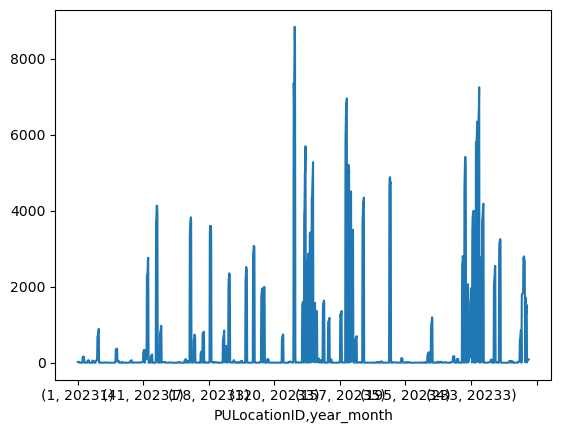

In [57]:
monthly_performance['passenger_count'].plot()

In [109]:
momthly_performance.reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PULocationID     1093 non-null   int64  
 1   year_month       1093 non-null   object 
 2   trip_distance    1093 non-null   float64
 3   fare_amount      1093 non-null   float64
 4   passenger_count  1093 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 42.8+ KB


In [129]:
final = momthly_performance.reset_index().set_index(pd.to_datetime(momthly_performance.reset_index()['year_month'], format='%Y%m')).drop(columns='year_month')

In [155]:
momthly_performance

trip_distance  fare_amount  passenger_count
PULocationID year_month                                             
1            20231           21.091613  1156.118065        20.838710
             20232           12.742500  1159.394286        22.535714
             20233           19.640323  1233.041290        22.129032
             20234            9.450667  1382.733333        26.600000
2            20231           13.120000     0.000000         4.000000
...                                ...          ...              ...
264          20235           82.890000   265.800000        11.000000
265          20231          126.912258  5008.275161        75.419355
             20232          585.654643  6214.102500        69.464286
             20233          729.702258  7672.011290        73.387097
             20234          284.559000  6222.201667        86.066667

[1093 rows x 3 columns]

In [60]:
%%time

df_pd = pd.read_csv(file_path, memory_map=False,low_memory=False)
df_pd[['tpep_pickup_datetime', 'tpep_dropoff_datetime']] = df_pd[['tpep_pickup_datetime', 'tpep_dropoff_datetime']].apply(pd.to_datetime)
df_pd['time_delta'] = df_pd['tpep_dropoff_datetime'] - df_pd['tpep_pickup_datetime']
df_pd['year_month'] = df_pd['tpep_dropoff_datetime'].dt.year.astype('str') + df_pd['tpep_dropoff_datetime'].dt.month.astype('str')
df_pd['day'] = df_pd['tpep_dropoff_datetime'].dt.date
df_pd['year'] = df_pd['tpep_dropoff_datetime'].dt.year

df_pd = df_pd[df_pd['year'] == 2023]

columns = ['PULocationID', 'time_delta', 'year_month', 'trip_distance', 'fare_amount', 'day', 'year', 'passenger_count']

df = df_pd[columns]

momthly_performance = (
df.groupby(
    ['PULocationID','day','year_month']
    )[['trip_distance', 
       'fare_amount', 
       'passenger_count']]
             .sum()
             .groupby(
            ['PULocationID','year_month']
                )
                 .mean()
)

momthly_performance.head()

CPU times: user 34.2 s, sys: 5.89 s, total: 40.1 s
Wall time: 41.5 s


trip_distance  fare_amount  passenger_count
PULocationID year_month                                             
1            202210           0.010000   117.500000         1.000000
             20231           21.091613  1156.118065        20.838710
             20232           12.742500  1159.394286        22.535714
             20233           19.640323  1233.041290        22.129032
             20234            9.450667  1382.733333        26.600000

In [162]:
momthly_performance.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1132 entries, (1, '202210') to (265, '20234')
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   trip_distance    1132 non-null   float64
 1   fare_amount      1132 non-null   float64
 2   passenger_count  1132 non-null   float64
dtypes: float64(3)
memory usage: 32.1+ KB


In [68]:
%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [70]:
%%time
%%memit
df_pd = pd.read_csv(file_path, memory_map=True, low_memory=False, parse_dates=['tpep_pickup_datetime', 'tpep_dropoff_datetime'])

df_pd[['tpep_pickup_datetime', 'tpep_dropoff_datetime']] = df_pd[['tpep_pickup_datetime', 'tpep_dropoff_datetime']].apply(pd.to_datetime)

df_pd['time_delta'] = df_pd['tpep_dropoff_datetime'] - df_pd['tpep_pickup_datetime']
df_pd['year_month'] = df_pd['tpep_dropoff_datetime'].dt.year.astype('str') + df_pd['tpep_dropoff_datetime'].dt.month.astype('str')
df_pd['day'] = df_pd['tpep_dropoff_datetime'].dt.date
df_pd['year'] = df_pd['tpep_dropoff_datetime'].dt.year

df_pd = df_pd[df_pd['year'] == 2023]

columns = ['PULocationID', 'time_delta', 'year_month', 'trip_distance', 'fare_amount', 'day', 'year', 'passenger_count']



df = df_pd[columns]


momthly_performance = (
df.groupby(
    ['PULocationID','day','year_month']
    )[['trip_distance', 
       'fare_amount', 
       'passenger_count']]
             .sum()
             .groupby(
            ['PULocationID','year_month']
                )
                 .mean()
)

momthly_performance.head()

peak memory: 11179.75 MiB, increment: 10152.33 MiB
CPU times: user 34.2 s, sys: 3.84 s, total: 38.1 s
Wall time: 38.9 s


In [63]:
momthly_performance.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1377 entries, (1, '20231') to (265, '20235')
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   trip_distance    1377 non-null   float64
 1   fare_amount      1377 non-null   float64
 2   passenger_count  1377 non-null   float64
dtypes: float64(3)
memory usage: 38.5+ KB


In [71]:
%%time
%%memit

df_pd = pd.read_csv(file_path, memory_map=False, low_memory=False, chunksize=10_000)

results = []
for chunk in df_pd:
    chunk[['tpep_pickup_datetime', 'tpep_dropoff_datetime']] = chunk[['tpep_pickup_datetime', 'tpep_dropoff_datetime']].apply(pd.to_datetime)
    chunk['time_delta'] = chunk['tpep_dropoff_datetime'] - chunk['tpep_pickup_datetime']
    chunk['year_month'] = chunk['tpep_dropoff_datetime'].dt.year.astype('str') + chunk['tpep_dropoff_datetime'].dt.month.astype('str')
    chunk['day'] = chunk['tpep_dropoff_datetime'].dt.date
    chunk['year'] = chunk['tpep_dropoff_datetime'].dt.year
    columns = ['PULocationID', 'time_delta', 'year_month', 'trip_distance', 'fare_amount', 'day', 'year', 'passenger_count']
    
    df = chunk[columns]



    momthly_performance = (
    df.groupby(
        ['PULocationID','day','year_month']
        )[['trip_distance', 
           'fare_amount', 
           'passenger_count']]
                 .sum()
                 .groupby(
                ['PULocationID','year_month']
                    )
                     .mean()
    )

    results.append(momthly_performance)

final = pd.concat(results)
final.head()

<string>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
<string>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
<string>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
<string>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
<string>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
<string>:6: UserWarn

peak memory: 8274.61 MiB, increment: 0.33 MiB
CPU times: user 31.3 s, sys: 4.05 s, total: 35.3 s
Wall time: 36.2 s


In [73]:
monthly_performance.head()

trip_distance  fare_amount  passenger_count
PULocationID year_month                                             
1            20231           21.091613  1156.118065        20.838710
             20232           12.742500  1159.394286        22.535714
             20233           19.640323  1233.041290        22.129032
             20234            9.450667  1382.733333        26.600000
             20235           22.986452  1320.114516        26.000000

In [74]:
final.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 203692 entries, (1, '20235') to (265, '20233')
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   trip_distance    203692 non-null  float64
 1   fare_amount      203692 non-null  float64
 2   passenger_count  203692 non-null  float64
dtypes: float64(3)
memory usage: 5.3+ MB


In [175]:
len(results)

1268

In [186]:
results[0].loc[(  4, '20234')]

trip_distance       234.87
fare_amount        1378.80
passenger_count     139.00
Name: (4, 20234), dtype: float64

In [187]:
results[1].loc[(  4, '20234')]

trip_distance       189.87
fare_amount        1033.80
passenger_count      92.00
Name: (4, 20234), dtype: float64

In [189]:
results[20].loc[(  4, '20234')]

trip_distance      12.63
fare_amount        74.70
passenger_count     9.00
Name: (4, 20234), dtype: float64

In [173]:
final.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 159224 entries, (4, '20234') to (265, '20233')
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   trip_distance    159224 non-null  float64
 1   fare_amount      159224 non-null  float64
 2   passenger_count  159224 non-null  float64
dtypes: float64(3)
memory usage: 4.1+ MB


In [174]:
final.head()

,,trip_distance,fare_amount,passenger_count
PULocationID,year_month,,,
4,20234,234.87,1378.80,139.0
7,20234,5.95,32.60,2.0
10,20234,40.59,206.55,1.0
13,20234,23.80,210.30,11.0
17,20234,0.00,3.00,1.0


In [195]:
x.head()

trip_distance  fare_amount  passenger_count
PULocationID year_month                                             
1            202210              0.020      235.000              2.0
             20231             653.330    35530.940            642.0
             20232             355.875    32004.040            619.0
             20233             599.865    38036.780            684.0
             20234             269.820    41189.725            795.0

In [196]:
momthly_performance.head()

trip_distance  fare_amount  passenger_count
PULocationID year_month                                             
4            20233               92.31       513.71              0.0
7            20233               40.95       164.81              0.0
             20234               14.17        51.66              0.0
13           20233               86.24       422.47              0.0
17           20233               34.78       139.75              0.0

In [197]:
import pandas as pd
from functools import reduce

df_pd = pd.read_csv(file_path, memory_map=False, parse_dates=['tpep_pickup_datetime', 'tpep_dropoff_datetime'], chunksize=10_000)

# Define the function to process each chunk
def process_chunk(chunk):
    chunk['time_delta'] = chunk['tpep_dropoff_datetime'] - chunk['tpep_pickup_datetime']
    chunk['year_month'] = chunk['tpep_dropoff_datetime'].dt.year.astype('str') + chunk['tpep_dropoff_datetime'].dt.month.astype('str')
    chunk['day'] = chunk['tpep_dropoff_datetime'].dt.date
    chunk['year'] = chunk['tpep_dropoff_datetime'].dt.year
    columns = ['PULocationID', 'time_delta', 'year_month', 'trip_distance', 'fare_amount', 'day', 'year', 'passenger_count']
    df = chunk[columns]
    
    momthly_performance = (
        df.groupby(['PULocationID', 'day', 'year_month'])
        [['trip_distance', 'fare_amount', 'passenger_count']]
        .sum()
        .groupby(['PULocationID', 'year_month'])
        .mean()
    )

    return momthly_performance

# Use reduce to combine the results from all chunks
results = reduce(lambda x, y: pd.concat([x, y]), (process_chunk(chunk) for chunk in df_pd))

final = results.reset_index()  # Reset the index to get a DataFrame
final.head()


/var/folders/48/j6k669vx63qd_68k2_502cl40000gn/T/ipykernel_42550/483867585.py:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  results = reduce(lambda x, y: pd.concat([x, y]), (process_chunk(chunk) for chunk in df_pd))
/var/folders/48/j6k669vx63qd_68k2_502cl40000gn/T/ipykernel_42550/483867585.py:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  results = reduce(lambda x, y: pd.concat([x, y]), (process_chunk(chunk) for chunk in df_pd))
/var/folders/48/j6k669vx63qd_68k2_502cl40000gn/T/ipykernel_42550/483867585.py:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  results = re

,PULocationID,year_month,trip_distance,fare_amount,passenger_count
0,4,20234,234.87,1378.80,139.0
1,7,20234,5.95,32.60,2.0
2,10,20234,40.59,206.55,1.0
3,13,20234,23.80,210.30,11.0
4,17,20234,0.00,3.00,1.0


In [207]:
results.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 159224 entries, (4, '20234') to (265, '20233')
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   trip_distance    159224 non-null  float64
 1   fare_amount      159224 non-null  float64
 2   passenger_count  159224 non-null  float64
dtypes: float64(3)
memory usage: 4.1+ MB


In [206]:
results.reset_index(['PULocationID','year_month']).groupby(['PULocationID','year_month']).sum()

trip_distance    fare_amount  passenger_count
PULocationID year_month                                               
1            202210           0.020000     235.000000         2.000000
             20231          653.330000   35530.940000       642.000000
             20232          355.875000   32004.040000       619.000000
             20233          599.865000   38036.780000       684.000000
             20234          269.820000   41189.725000       795.000000
...                                ...            ...              ...
265          202210           2.330000      10.000000         1.000000
             20231         3629.886667  143351.081667      2147.166667
             20232         6731.669333  123486.299667      1776.000000
             20233         8717.638667  160813.071500      2105.000000
             20234         4862.391667  154557.326000      2367.833333

[1132 rows x 3 columns]

In [208]:
momthly_performance.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 144 entries, (4, '20233') to (265, '20233')
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   trip_distance    144 non-null    float64
 1   fare_amount      144 non-null    float64
 2   passenger_count  144 non-null    float64
dtypes: float64(3)
memory usage: 12.9+ KB


In [213]:
import pandas as pd
from functools import reduce

#file_path = 'your_file_path.csv'
chunksize = 10_000

# Initialize an empty list to store the results from each chunk
results = []

# Define the function to process each chunk and aggregate the data
def process_chunk(chunk):
    chunk['time_delta'] = chunk['tpep_dropoff_datetime'] - chunk['tpep_pickup_datetime']
    chunk['year_month'] = chunk['tpep_dropoff_datetime'].dt.year.astype('str') + chunk['tpep_dropoff_datetime'].dt.month.astype('str')
    chunk['day'] = chunk['tpep_dropoff_datetime'].dt.date
    chunk['year'] = chunk['tpep_dropoff_datetime'].dt.year
    columns = ['PULocationID', 'time_delta', 'year_month', 'trip_distance', 'fare_amount', 'day', 'year', 'passenger_count']
    df = chunk[columns]
    
    # monthly_performance = (
    #     df.groupby(['PULocationID', 'day', 'year_month'])
    #     [['trip_distance', 'fare_amount', 'passenger_count']]
    #     .sum()
    #     .groupby(['PULocationID', 'year_month'])
    #     .mean()
    )

    return monthly_performance

# Iterate through the chunks, process each chunk, and append the result to the 'results' list
# for chunk in pd.read_csv(file_path, memory_map=True, parse_dates=['tpep_pickup_datetime', 'tpep_dropoff_datetime'], chunksize=chunksize):
#     results.append(process_chunk(chunk))

# Concatenate all the results into the final DataFrame
final = reduce(lambda x, y: pd.add([x, y]), (process_chunk(chunk) for chunk in df_pd))  


# print(final.head())


SyntaxError: unmatched ')' (2217541468.py, line 25)

In [210]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159224 entries, 0 to 159223
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   PULocationID     159224 non-null  int64  
 1   year_month       159224 non-null  object 
 2   trip_distance    159224 non-null  float64
 3   fare_amount      159224 non-null  float64
 4   passenger_count  159224 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 6.1+ MB
